In [10]:
import numpy as np
np.random.seed()

import matplotlib.pyplot as plt



In [2]:
#####PARAMETERS
delta = 0.2
Nss=75
mu = 0.07
gamma = 0.1
c=0.1
replicates = 200

In [3]:
#Time vector
T=300
N=15 #Number of measurements and time points to plot

times=np.zeros(N+1)
for i in range(0,N+1):
    times[i]=T*(i/N)


In [4]:
#REPLICATION RATE, LINEAR FEEDBACK CONTROL
def rep_rate(w,m):
  rate = mu+c*(Nss-w-delta*m) 
  return max(0, rate)

def find_reaction(xi):
  for k in range (0,len(rates)):
    if partsum[k] >= xi:
        return k 

In [5]:
#####INITIAL CONDITIONS.
h0=0.5

#Set initial populations at steady state (w+delta*m=Nss). If condition to avoid division by zero in the case delta==0 and h0==1
if (delta==0 and h0==1): 
  w0=0
  m0=Nss
else:
  w0 = (1-h0)*Nss/(1-h0+delta*h0)
  m0 = h0*Nss/(1-h0+delta*h0)

X0=np.array([w0,m0,w0,m0])


In [6]:
#####STOICHIOMETRY MATRIX
V=np.array([[-1, 0, 0, 0], [0, -1, 0, 0], [0, 0,-1,0], [0, 0,0,-1],[1, 0, 0, 0], [0, 1, 0, 0], [0, 0,1,0], [0, 0,0,1],[-1,0,+1,0],[0,-1,0,+1],[1,0,-1,0],[0,+1,0,-1]])

In [7]:
X_mean = np.zeros([4,N+1])
h_mean=np.zeros([2,N+1])
h_squares=np.zeros([2,N+1])

                          ####LOOP OVER REPLICATES####
for i in np.arange(replicates):

      t=0
      j=0
      X=X0

                        ####LOOP OVER TIME####

      while (t<T):
              
          rates=np.array([mu*X[0],mu*X[1],mu*X[2],mu*X[3],rep_rate(X[0], X[1])*X[0],rep_rate(X[0], X[1])*X[1],rep_rate(X[2],X[3])*X[2],rep_rate(X[2], X[3])*X[3],gamma*X[0],gamma*X[1],gamma*X[2],gamma*X[3]])
          rate_total=np.sum(rates)
          partsum=np.cumsum(rates)

          
          rate=1/rate_total
          wait_time = np.random.exponential(rate)
          
          
          #Figure out which reaction has taken place
          xi=np.random.uniform(0,rate_total,1) 
          k=find_reaction(xi)
          X = X + V[k] 
              
          t=t+wait_time
          if t > times[j]:
            X_mean[:,j]=X_mean[:,j]+X
            h1=X[1]/(X[0]+X[1])
            h2=X[3]/(X[2]+X[3])
            h_mean[:,j]=h_mean[:,j]+np.array([h1,h2])

            #Calculate also sum of squares of heteroplasmy, to estimate SEM later
            h_squares[:,j]=h_squares[:,j]+np.array([h1**2,h2**2])
            j=j+1


      j=0

#Take the stochastic average, dividing by number of replicates of the evolution of the system  
h_mean=h_mean/replicates
X_mean=X_mean/replicates

#Estimate SEM for heteroplasmy
var_h=h_squares/replicates - h_mean**2
SEM=np.sqrt(var_h/replicates)


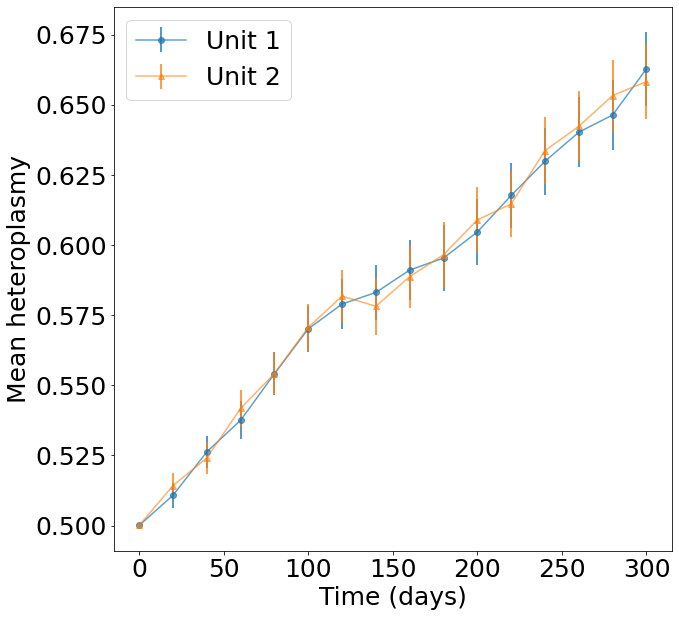

In [14]:
#Plot mean heteroplasmy against time in the two units

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 25})

plt.xlabel("Time (days)")
plt.ylabel("Mean heteroplasmy")
plt.errorbar(times, h_mean[0], yerr=SEM[0], Alpha=0.7, label="Unit 1", marker="o")
plt.errorbar(times, h_mean[1], yerr=SEM[1],Alpha=0.6, label="Unit 2", marker="^")
plt.legend()

plt.show()